In [87]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [88]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T # each col represents an example
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. 

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

print(X_dev.shape[0])

784


In [90]:
def init_params():
    W1 = np.random.randn(10, 784) * 0.01
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return W1, W2, b1, b2

In [103]:
def ReLU(Z):
    return np.maximum(Z, 0)
    
def softmax(Z):
    S = np.exp(Z) / sum(np.exp(Z))
    return S

In [92]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [93]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_derivative(Z):
    return Z > 0

In [94]:
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y =  one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1, axis = 1, keepdims = True)
    return dW1, dW2, db1, db2

In [95]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [101]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, W2, b1, b2 = init_params()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, dW2, db1, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [104]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.10)

Iteration:  0
[9 2 0 ... 2 2 0] [5 5 9 ... 4 6 2]
0.04746341463414634
Iteration:  100
[3 9 9 ... 4 6 1] [5 5 9 ... 4 6 2]
0.5779268292682926
Iteration:  200
[5 5 9 ... 4 6 7] [5 5 9 ... 4 6 2]
0.8059756097560976
Iteration:  300
[5 5 9 ... 4 6 7] [5 5 9 ... 4 6 2]
0.8599756097560975
Iteration:  400
[5 5 9 ... 4 6 7] [5 5 9 ... 4 6 2]
0.8784634146341463


In [105]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


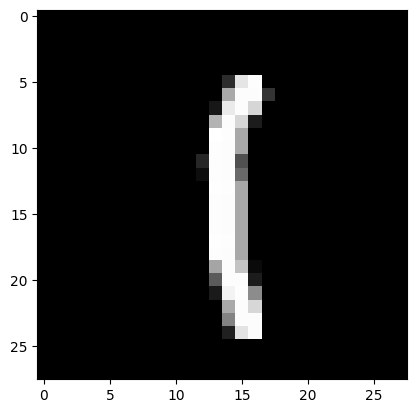

In [122]:
test_prediction(70, W1, b1, W2, b2)